# Notes and examples on xarray

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays.

The core data structure introduced in the xarray package are:
- **DataArray**: a labeled N-dim array
- **Dataset**: multi-dim, in memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions.

In [3]:
import numpy as np
import pandas as pd
import xarray as xr

## DataArray

In [4]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.39469021, -1.86006763,  0.77659641],
       [-1.43450501, -0.07295748,  1.4877309 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

Two coordinate labels ‘10’ and ‘20’ have been associated with the two locations along the x dimension.

In [5]:
data.values

array([[-0.39469021, -1.86006763,  0.77659641],
       [-1.43450501, -0.07295748,  1.4877309 ]])

In [6]:
data.dims

('x', 'y')

In [7]:
data.attrs

{}

We can access data, having labels, with different methods.

For example if we want to access the data with x=10:

In [8]:
data[0,:] # positional and by integer label, like numpy

<xarray.DataArray (y: 3)>
array([-0.39469021, -1.86006763,  0.77659641])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [9]:
data.loc[10] # loc: positional and coordinate label, like pandas

<xarray.DataArray (y: 3)>
array([-0.39469021, -1.86006763,  0.77659641])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [10]:
data.isel(x=0) # isel or "integer select":  by dimension name and integer label

<xarray.DataArray (y: 3)>
array([-0.39469021, -1.86006763,  0.77659641])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [11]:
data.sel(x=10) # sel or "select": by dimension name and coordinate label

<xarray.DataArray (y: 3)>
array([-0.39469021, -1.86006763,  0.77659641])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

## Attributes

Metadata can be set, or can be already present in the dataset we're analyzing. The structure is a dictionary so can be customized.

In [12]:
data.attrs["long_name"] = "random velocity"
data.attrs["units"]     = "m/s"

data.attrs

{'long_name': 'random velocity', 'units': 'm/s'}

## Computation 

Most of the operations can be done like with numpy ndarrays. Some operations may take advantage of dimension names instead of axis numbers.

In [13]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([-0.91459761, -0.96651255,  1.13216365])
Dimensions without coordinates: y

## Plot

It is possible to automatically plot a dataset with matplotlib and the metadata will be used to automatically label axis, colorbar and units.

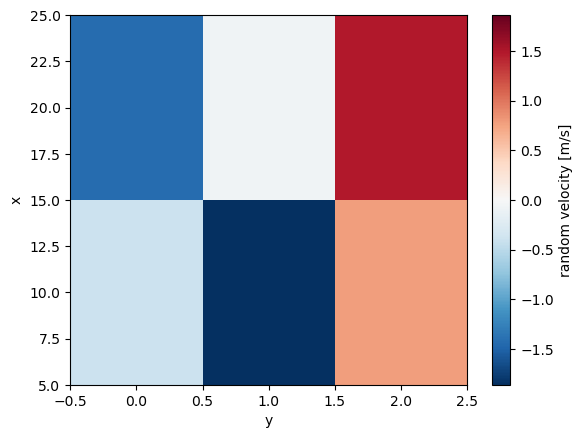

In [14]:
data.plot()

## Dataset

It is a dict-like object of aligned **DataArray** objects.
We can for example create a **Dataset** with 3 different **DataArray**, with different dimensions 

In [15]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1, 2]), baz=np.pi))
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 -0.3947 -1.86 0.7766 -1.435 -0.07296 1.488
    bar      (x) int64 1 2
    baz      float64 3.142

To pull out a single **DataArray** from a **Dataset** two codes are possible:

In [17]:
ds["foo"]
ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[-0.39469021, -1.86006763,  0.77659641],
       [-1.43450501, -0.07295748,  1.4877309 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:  random velocity
    units:      m/s

## Read netCDF files

We can write a nc file:

In [19]:
ds.to_netcdf("example.nc")

And files can be open as: 

In [20]:
data_climate = xr.open_dataset("/work/datasets/obs/ERA5/mean_sea_level_pressure/mon/ERA5_mean_sea_level_pressure_mon_0.25x0.25_sfc_1979-2021.nc")

In [21]:
data_climate

<xarray.Dataset>
Dimensions:  (time: 516, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    msl      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Apr 13 15:16:22 2022: cdo -f nc4 -z zip cat /work/datas...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...